In [1]:
%%html
<style> table {margin-left: 0 !important;} </style>

In [2]:
import sys, subprocess
hostname = subprocess.check_output("hostname", shell=True, text=True).strip(); username = subprocess.check_output("whoami", shell=True, text=True).strip()
python_executable = sys.executable; python_version = sys.version; python_version_info = sys.version_info
print(f"Hostname: {hostname}\n" f"User: {username}\n" f"Python Executable: {python_executable}\n" f"Python Version: {python_version}\n" f"Python Version Info: {python_version_info}")

Hostname: ip-172-26-5-168
User: sensei
Python Executable: /opt/jupyterhub/bin/python3
Python Version: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
Python Version Info: sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


Exit iterations in velocity potential because tolerance met 
Iterations = 443
End Calculations
Iterations    =  443
Closure Error =  0.0
Head Map
----


0 [10.    10.    10.    10.    10.    10.    10.    10.    10.    10.
 10.    10.    10.    10.     9.478  0.524  0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
1 [10.     9.98   9.959  9.936  9.91   9.881  9.848  9.808  9.763  9.71
  9.652  9.591  9.535  9.497  9.478  0.524  0.505  0.467  0.411  0.351
  0.293  0.241  0.196  0.157  0.125  0.097  0.073  0.052  0.034  0.016
  0.   ]
2 [10.     9.96   9.919  9.874  9.824  9.767  9.701  9.623  9.532  9.426
  9.306  9.178  9.054  8.965  8.949  1.055  1.039  0.95   0.827  0.699
  0.58   0.475  0.385  0.309  0.244  0.19   0.143  0.102  0.066  0.032
  0.   ]
3 [10.     9.943  9.883  9.818  9.746  9.663  9.566  9.451  9.316  9.156
  8.969  8.759  8.538  8.351  8.336  1.67   1.654  1.468  1.247  1.038
  0.852  0.694  0.56   0.448  0.354  0.275  0.207  0.148  0.095  0.047
  0.   ]
4 [10.     9.927  9.852  9.77   9.678  9.572  9.448  9.3    9.124  8.912
  8.657  8.351  7.986  7.559  6.629  3.37

Text(0.5, 1.0, 'Contour Plot of Heads from Sheetpile1 Input')

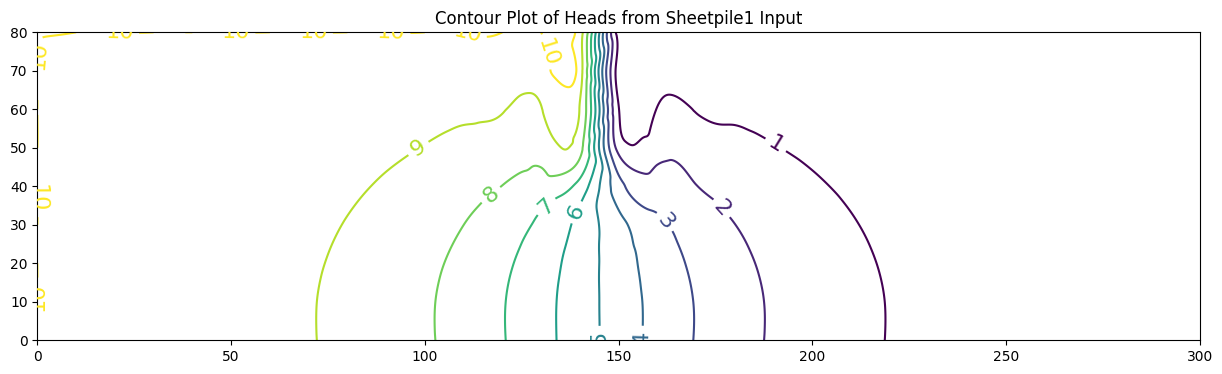

In [3]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("PotentialFnSheetpile1.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
head =[] # empty list
for irow in range(nrows):
        head.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
headold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
headold = update(head,headold) # update
##writearray(head)
##print("----")
##writearray(headold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            head [0][jcol ] = head[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            head [nrows-1][jcol ] = head[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            head[irow][0] = head [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            head [irow][ncols-1] = head[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            head[irow][jcol]=( amat[irow][jcol]*head[irow-1][jcol  ] 
                              +bmat[irow][jcol]*head[irow+1][jcol  ] 
                              +cmat[irow][jcol]*head[irow  ][jcol-1] 
                              +dmat[irow][jcol]*head[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(head)
##    print("----")
##    writearray(headold)
    percentdiff = sse(head,headold)
    if  percentdiff <= tolerance:
        print("Exit iterations in velocity potential because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    headold = update(head,headold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Head Map")
print("----")
writearray(head)
print("----")
############# Contour Plot
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 3000)
lat = numpy.linspace(min(coord_y), max(coord_y), 800)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(15, 4)
levels1 = [1,2,3,4,5,6,7,8,9,10]
CS = ax.contour(X, Y, Z, levels1)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_title('Contour Plot of Heads from Sheetpile1 Input')

Exit iterations in Stream Function because tolerance met 
Iterations = 396
End Calculations
Iterations    =  396
Closure Error =  0.0
Stream Function Map
----
0 [100.     96.845  93.555  89.987  85.989  81.394  76.015  69.642  62.046
  52.99   42.26   29.74   15.542   0.191   0.      0.      0.19   15.469
  29.592  42.031  52.669  61.62   69.093  75.318  80.519  84.898  88.632
  91.878  94.773  97.442 100.   ]
1 [100.     96.845  93.555  89.987  85.989  81.394  76.015  69.642  62.046
  52.99   42.26   29.74   15.542   0.191   0.16    0.16    0.19   15.469
  29.592  42.031  52.669  61.62   69.093  75.318  80.519  84.898  88.632
  91.878  94.773  97.442 100.   ]
2 [100.     96.982  93.832  90.416  86.586  82.178  77.008  70.865  63.507
  54.663  44.05   31.419  16.694   0.337   0.304   0.304   0.336  16.625
  31.277  43.83   54.356  63.099  70.34   76.342  81.342  85.543  89.121
  92.229  94.999  97.553 100.   ]
3 [100.     97.249  94.377  91.26   87.76   83.724  78.976  73.304  66.452
 

Text(0.5, 1.0, 'Contour Plot of Stream Function for Sheetpile1 Input')

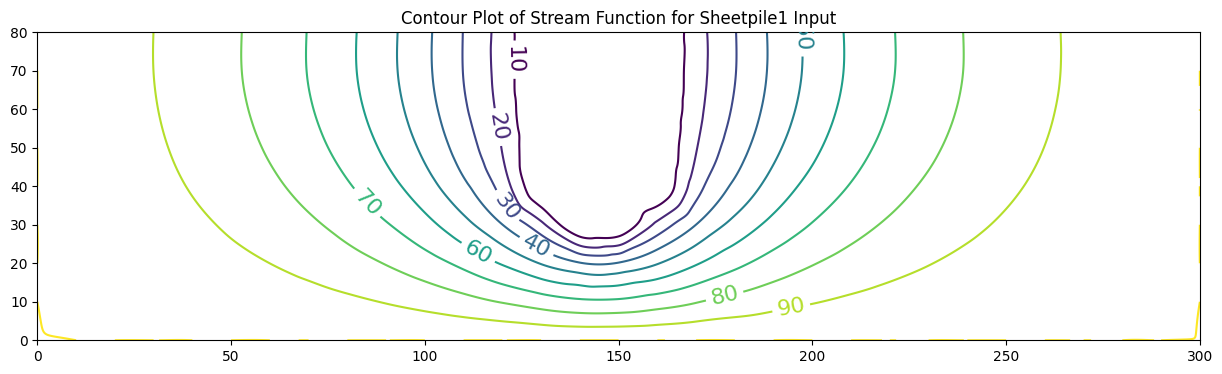

In [4]:
def sse(matrix1,matrix2):
    sse=0.0
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    for ir in range(nr):
        for jc in range(nc):
            sse=sse+(matrix1[ir][jc]-matrix2[ir][jc])**2
    return(sse)

def update(matrix1,matrix2):
    nr=len(matrix1) # get row count
    nc=len(matrix1[0]) # get column count
    ##print(nr,nc)
    for ir in range(nr):
        for jc in range(nc):
            ##print(ir,jc)
            matrix2[ir][jc]=matrix1[ir][jc]
    return(matrix2)

def writearray(matrix):
    nr=len(matrix) # get row count
    nc=len(matrix[0]) # get column count
    import numpy as np
    new_list = list(np.around(np.array(matrix), 3))    
    for ir in range(nr):
        print(ir,new_list[ir][:])
    return()

localfile = open("StreamFnSheetpile1.txt","r") # connect and read file for 2D gw model
deltax = float(localfile.readline())
deltay = float(localfile.readline())
deltaz = float(localfile.readline())
nrows = int(localfile.readline())
ncols = int(localfile.readline())
tolerance = float(localfile.readline())
maxiter = int(localfile.readline())
distancex = [] # empty list
distancex.append([float(n) for n in localfile.readline().strip().split()])
distancey = [] # empty list
distancey.append([float(n) for n in localfile.readline().strip().split()])
boundarytop = [] #empty list
boundarytop.append([float(n) for n in localfile.readline().strip().split()])
boundarybottom = [] #empty list
boundarybottom.append([int(n) for n in localfile.readline().strip().split()])
boundaryleft = [] #empty list
boundaryleft.append([int(n) for n in localfile.readline().strip().split()])
boundaryright = [] #empty list
boundaryright.append([int(n) for n in localfile.readline().strip().split()])
stream =[] # empty list
for irow in range(nrows):
        stream.append([float(n) for n in localfile.readline().strip().split()])
hydcondx = [] # empty list
for irow in range(nrows):
        hydcondx.append([float(n) for n in localfile.readline().strip().split()])
hydcondy = [] # empty list
for irow in range(nrows):
        hydcondy.append([float(n) for n in localfile.readline().strip().split()])
localfile.close() # Disconnect the file
##
amat = [[0 for j in range(ncols)] for i in range(nrows)]
bmat = [[0 for j in range(ncols)] for i in range(nrows)]
cmat = [[0 for j in range(ncols)] for i in range(nrows)]
dmat = [[0 for j in range(ncols)] for i in range(nrows)]
##
for irow in range(1,nrows-1):
    for jcol in range(1,ncols-1):
        amat[irow][jcol] = (( hydcondx[irow-1][jcol  ]+ hydcondx[irow  ][jcol  ]) * deltaz ) /(2.0*deltax**2)
        bmat[irow][jcol] = (( hydcondx[irow  ][jcol  ]+ hydcondx[irow+1][jcol  ]) * deltaz ) /(2.0*deltax**2)
        cmat[irow][jcol] = (( hydcondy[irow  ][jcol-1]+ hydcondy[irow  ][jcol  ]) * deltaz ) /(2.0*deltay**2)
        dmat[irow][jcol] = (( hydcondy[irow  ][jcol  ]+ hydcondy[irow  ][jcol+1]) * deltaz ) /(2.0*deltay**2)
##
streamold = [[0 for jc in range(ncols)] for ir in range(nrows)] #force new matrix
streamold = update(stream,streamold) # update
##writearray(stream)
##print("----")
##writearray(streamold)
##print("--------")
tolflag = False
for iter in range(maxiter):
##    print("begin iteration")
##    writearray(stream)
##    print("----")
##    writearray(streamold)
##    print("--------")

# Boundary Conditions

# first and last row special == no flow boundaries
    for jcol in range(ncols):
        if boundarytop[0][jcol] == 0: # no - flow at top
            stream [0][jcol ] = stream[1][jcol ]
        if boundarybottom[0][ jcol ] == 0: # no - flow at bottom
            stream [nrows-1][jcol ] = stream[nrows-2][jcol ]
# first and last column special == no flow boundaries     
    for irow in range(nrows): 
        if  boundaryleft[0][ irow ] == 0:
            stream[irow][0] = stream [irow][1] # no - flow at left
        if boundaryright[0][ irow ] == 0: 
            stream [irow][ncols-1] = stream[ irow ][ncols-2] # no - flow at right
# interior updates
    for irow in range(1,nrows-1):
        for jcol in range(1,ncols-1):
            stream[irow][jcol]=( amat[irow][jcol]*stream[irow-1][jcol  ] 
                              +bmat[irow][jcol]*stream[irow+1][jcol  ] 
                              +cmat[irow][jcol]*stream[irow  ][jcol-1] 
                              +dmat[irow][jcol]*stream[irow  ][jcol+1])/(amat[ irow][jcol ]+ bmat[ irow][jcol ]+ cmat[ irow][jcol ]+ dmat[ irow][jcol ])
# test for stopping iterations
##    print("end iteration")
##    writearray(stream)
##    print("----")
##    writearray(streamold)
    percentdiff = sse(stream,streamold)
    if  percentdiff <= tolerance:
        print("Exit iterations in Stream Function because tolerance met ")
        print("Iterations =" , iter+1 ) ;
        tolflag = True
        break
    streamold = update(stream,streamold)
print("End Calculations")
print("Iterations    = ",iter+1)
print("Closure Error = ",round(percentdiff,3))
print("Stream Function Map")
print("----")
writearray(stream)
print("----")
####################### Contour Plot ###############
my_xyz2 = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
        my_xyz2.append([distancex[0][jcol],distancey[0][irow],stream[irow][jcol]])
import pandas
my_xyz2 = pandas.DataFrame(my_xyz2) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x2 = my_xyz2[0].values.tolist() # column 0 of dataframe
coord_y2 = my_xyz2[1].values.tolist() # column 1 of dataframe
coord_z2 = my_xyz2[2].values.tolist() # column 2 of dataframe
coord_xy2 = numpy.column_stack((coord_x2, coord_y2))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x2), max(coord_x2), 3000)
lat = numpy.linspace(min(coord_y2), max(coord_y2), 800)
X2, Y2 = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z2 = griddata(numpy.array(coord_xy2), numpy.array(coord_z2), (X2, Y2), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(15, 4)
levels = [10,20,30,40,50,60,70,80,90,100]
CS2 = ax.contour(X2, Y2, Z2, levels )
ax.clabel(CS2, inline=2, fontsize=16)
ax.set_title('Contour Plot of Stream Function for Sheetpile1 Input')

Text(0.5, 1.0, 'Flownet for Sheetpile1 Input')

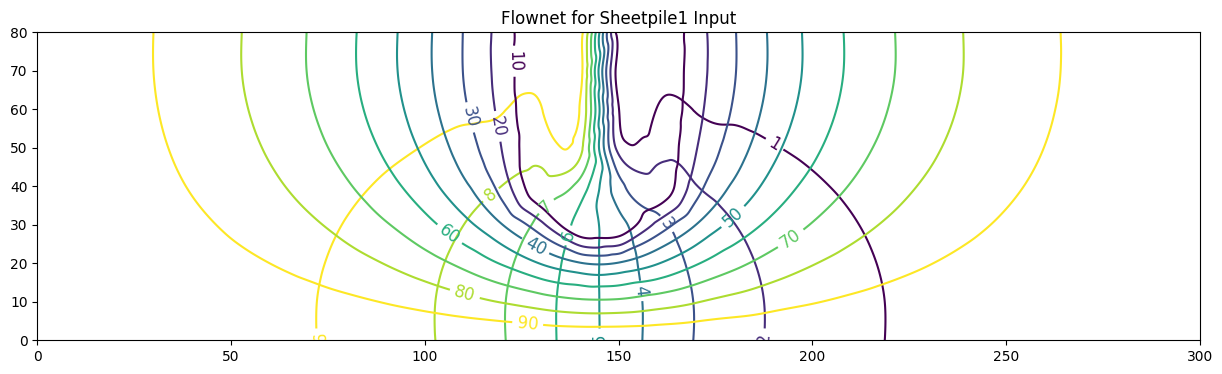

In [5]:
# Head (Velocity Potential Map)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
Z2 = griddata(numpy.array(coord_xy2), numpy.array(coord_z2), (X2, Y2), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(15, 4)
levels1 = [1,2,3,4,5,6,7,8,9]
CS = ax.contour(X, Y, Z, levels1)
levels2 = [10,20,30,40,50,60,70,80,90]
CS2 = ax.contour(X2, Y2, Z2, levels2 )
ax.clabel(CS, inline=2, fontsize=12)
ax.clabel(CS2, inline=2, fontsize=12)
ax.set_title('Flownet for Sheetpile1 Input')

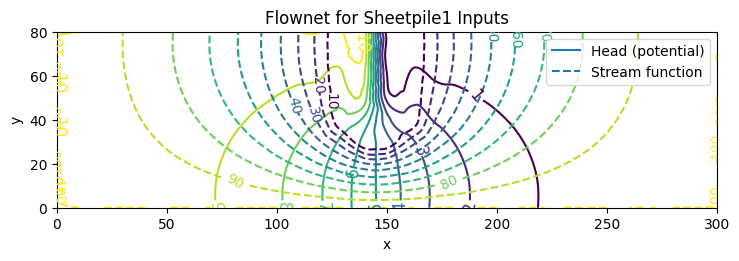

In [6]:
%reset -f
from potential_flow_mod import read_potential_input, solve_potential
from flownet_plotter import write_xyz_grid, plot_flownet

# 1) Solve velocity potential (head)
modelp = read_potential_input("PotentialFnSheetpile1.txt")
head, niter, closure = solve_potential(modelp, verbose=False)
#fig = plot_head_contours(modelp.grid.distancex, modelp.grid.distancey, head, title="Contour Plot of Heads from Sheetpile1 Input")

# 2) Write solver outputs as XYZ (3 columns: x y value)
write_xyz_grid(modelp.grid.distancex, modelp.grid.distancey, head, "head_xyz.txt")

# 3) Solve stream function (streamlines)
models = read_potential_input("StreamFnSheetpile1.txt")
stream, niter, closure = solve_potential(models, verbose=False)
#fig = plot_head_contours(models.grid.distancex, models.grid.distancey, stream, title="Contour Plot of Heads from Sheetpile1 Input")

# 4) Write solver outputs as  XYZ (3 columns: x y value)
write_xyz_grid(models.grid.distancex, models.grid.distancey, stream, "stream_xyz.txt")

# 5) Make the flownet
fig, ax = plot_flownet(
    "head_xyz.txt", "stream_xyz.txt",
    head_levels=[1,2,3,4,5,6,7,8,9,10],
    stream_levels=[10,20,30,40,50,60,70,80,90,100],
    title="Flownet for Sheetpile1 Inputs",
    save_png="flownet1.png",
    transparent=True
)

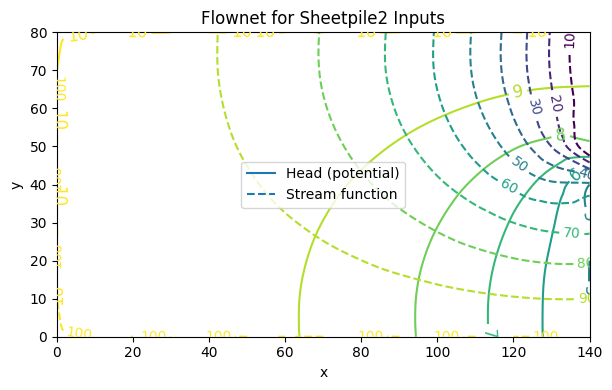

In [7]:
%reset -f
from potential_flow_mod import read_potential_input, solve_potential
from flownet_plotter import write_xyz_grid, plot_flownet

# 1) Solve velocity potential (head)
modelp = read_potential_input("PotentialFnSheetpile2.txt")
head, niter, closure = solve_potential(modelp, verbose=False)
#fig = plot_head_contours(modelp.grid.distancex, modelp.grid.distancey, head, title="Contour Plot of Heads from Sheetpile1 Input")

# 2) Write solver outputs as XYZ (3 columns: x y value)
write_xyz_grid(modelp.grid.distancex, modelp.grid.distancey, head, "head_xyz.txt")

# 3) Solve stream function (streamlines)
models = read_potential_input("StreamFnSheetpile2.txt")
stream, niter, closure = solve_potential(models, verbose=False)
#fig = plot_head_contours(models.grid.distancex, models.grid.distancey, stream, title="Contour Plot of Heads from Sheetpile1 Input")

# 4) Write solver outputs as  XYZ (3 columns: x y value)
write_xyz_grid(models.grid.distancex, models.grid.distancey, stream, "stream_xyz.txt")

# 5) Make the flownet
fig, ax = plot_flownet(
    "head_xyz.txt", "stream_xyz.txt",
    head_levels=[1,2,3,4,5,6,7,8,9,10],
    stream_levels=[10,20,30,40,50,60,70,80,90,100],
    title="Flownet for Sheetpile2 Inputs",
    save_png="flownet2.png",
    transparent=True
)